# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

## Part 2: Customer Segmentation Report

In this notebook, I will use unsupervised learning techniques to investigate the relationship between the general population in Germany and the mail-order company's existing customers.

### Importing Libraries

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# import some helper functions
from helpers import pca_plots, get_principal_component, plot_kmeans, get_important_features

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# load in dataframes from previous notebook
azdias_combined = pd.read_csv("azdias_combined_new.csv")
customer_combined = pd.read_csv("customer_combined_new.csv")

### Feature Scaling

Before applying principal component analysis (PCA) to the dataset, I will scale my features so that the principal component vectors are not affected by the differences in magnitude of features in my data. 

I first tried MinMaxScaler, which translates each feature to between 0 and 1, but due to RAM issues, my kernel kept crashing.

Hence, in the end, I went to RobustScaler, which is a scaler that is robust to outliers. The same scaler is fit on the azdias data and used to transform both the azdias and customer data.

In [4]:
#scaling
# use robust scaler as MinMaxScaler took up too much RAM
# fit on azdias
scaler = RobustScaler()
scaler.fit(azdias_combined)

#transform azdias
azdias_scaled = scaler.transform(azdias_combined)
azdias_scaled = pd.DataFrame(azdias_scaled, columns=azdias_combined.columns)

In [5]:
# transform customer
customer_scaled = scaler.transform(customer_combined)
customer_scaled = pd.DataFrame(customer_scaled, columns=customer_combined.columns)

In [6]:
azdias_scaled.head()

,ALTERSKATEGORIE_FEIN,ANZ_HH_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,D19_LOTTO,D19_SOZIALES,D19_TELKO_ONLINE_QUOTE_12,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSI_ONLINE_QUOTE_12,EWDICHTE,FIRMENDICHTE,GEMEINDETYP,HEALTH_TYP,HH_DELTA_FLAG,INNENSTADT,KKK,KONSUMNAEHE,KONSUMZELLE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_LEBENSPHASE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,ONLINE_AFFINITAET,ORTSGR_KLS9,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,...,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,D19_KONSUMTYP_1.0,D19_KONSUMTYP_2.0,D19_KONSUMTYP_3.0,D19_KONSUMTYP_4.0,D19_KONSUMTYP_5.0,D19_KONSUMTYP_6.0,D19_KONSUMTYP_9.0,GEBAEUDETYP_RASTER_1.0,GEBAEUDETYP_RASTER_2.0,GEBAEUDETYP_RASTER_3.0,GEBAEUDETYP_RASTER_4.0,GEBAEUDETYP_RASTER_5.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,NATIONALITAET_KZ_0,NATIONALITAET_KZ_1,NATIONALITAET_KZ_2,NATIONALITAET_KZ_3,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6
0,0.50,0.0,0.0,-0.75,-0.4,-0.333333,0.333333,0.5,-0.666667,0.000000,-0.333333,-0.666667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,1.0,0.0,-0.333333,-1.0,1.0,0.0,0.000000,0.0,-0.333333,0.000,0.0,-0.333333,0.000000,0.5,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.50,0.0,-1.0,-0.25,-0.8,0.000000,-0.333333,-0.5,0.333333,0.333333,0.666667,-0.333333,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-0.50,0.0,1.000000,0.0,0.0,0.333333,-3.0,0.5,0.0,-0.142857,0.0,-0.500000,0.750,1.0,-0.666667,-0.666667,0.0,-0.5,0.0,-1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.25,0.0,1.0,-0.75,0.0,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,-0.333333,10.0,1.25,0.0,0.0,0.0,2.0,0.0,0.25,1.0,-0.055556,1.0,0.0,-1.333333,0.0,0.5,0.0,1.285714,1.0,1.166667,0.000,0.0,0.666667,0.333333,0.0,0.5,0.0,0.0,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.25,0.0,-1.0,0.25,0.4,0.666667,-0.333333,-1.0,0.666667,0.666667,0.000000,-0.333333,0.0,1.25,0.0,4.0,0.0,0.0,0.0,-0.50,0.0,1.000000,1.0,0.0,0.666667,1.0,1.0,0.0,0.000000,0.0,-0.166667,0.125,0.0,-0.666667,-0.666667,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.00,0.0,1.0,0.25,-0.4,0.000000,0.666667,1.0,-0.666667,0.000000,-0.666667,-0.666667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,1.0,-0.555556,0.0,0.0,-0.666667,0.0,1.0,0.0,0.000000,0.0,-0.333333,-0.125,0.0,-0.333333,0.333333,0.5,0.0,-1.0,-1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Principal Component Analysis (PCA)

PCA is used to reduce the dimensionality of our data. Each prinicpal component is a unit vector that explains the maximal amount of variance.

I first tried with a large value of principal components to determine a suitable number of principal components. Through a plot of percentage cumulative variance explained vs the number of components, I will later on select the first 100 prinicpal components as they explain more than 85% of variance.

In [8]:
pca = PCA(n_components=437)
pca.fit_transform(azdias_scaled)

array([[-5.17339378e+00, -7.12884071e-01,  3.01127841e+00, ...,
         1.18219060e-15,  4.82729679e-15, -2.25711921e-16],
       [-2.10117998e+00, -1.05854998e+00,  2.72415110e+00, ...,
        -6.11973163e-16,  4.10202941e-15,  1.98510420e-15],
       [-1.01573112e+00,  4.90913797e-01, -1.96522089e+00, ...,
        -7.95713760e-16, -3.68133220e-15,  1.80999895e-15],
       ...,
       [ 3.35234035e-01, -6.91297983e-01,  2.65589301e+00, ...,
        -4.65034908e-18,  1.48817519e-16, -1.51440660e-16],
       [-4.30738042e+00, -2.05282677e+00,  5.71439673e-01, ...,
        -1.21330707e-16, -2.70266201e-16, -1.40455502e-16],
       [ 3.20391215e+00,  9.11771774e-01,  5.15348871e+00, ...,
         7.89686198e-17,  9.56011909e-17, -2.29915848e-16]])

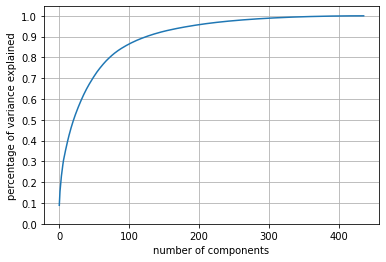

In [9]:
pca_plots(pca)

The cell below shows some of the more important features and their corresponding weights in first and second principal component. The features and weights are sorted in descending order.

In [10]:
# first principal component
get_principal_component(pca, azdias_scaled, 0)

D19_HAUS_DEKO          0.243046
D19_BEKLEIDUNG_REST    0.233349
D19_KOSMETIK           0.212510
D19_KINDERARTIKEL      0.204340
D19_TELKO_MOBILE       0.198775
Name: 0, dtype: float64
D19_BANKEN_ONLINE_DATUM     -0.132058
D19_VERSAND_OFFLINE_DATUM   -0.161060
D19_VERSI_DATUM             -0.164999
D19_BANKEN_DATUM            -0.169222
D19_GESAMT_OFFLINE_DATUM    -0.205326
Name: 0, dtype: float64


In [11]:
# seconf principal component
get_principal_component(pca, azdias_scaled, 1)

KBA05_SEG8      0.253791
KBA05_SEG6      0.252152
KBA05_SEG5      0.250504
KBA05_ANHANG    0.237685
KBA05_MOTRAD    0.223947
Name: 1, dtype: float64
KBA13_KW_50                 -0.019709
D19_BANKEN_DATUM            -0.019958
D19_VERSAND_OFFLINE_DATUM   -0.023706
D19_GESAMT_OFFLINE_DATUM    -0.027668
KBA05_ANTG3                 -0.034370
Name: 1, dtype: float64


Now, I reapply PCA using 100 components that explain more than 85% of variance.

In [15]:
# select number of components to retain
# reapply PCA with 100 components (more than 85% of variance retained)
pca_100 = PCA(n_components=100)
azdias_pca = pca_100.fit_transform(azdias_scaled)
azdias_pca = pd.DataFrame(azdias_pca)

customer_pca = pca_100.transform(customer_scaled)
customer_pca = pd.DataFrame(customer_pca)

### CLustering

Using sklearn's KMeans, I will now perform k-means clustering on the data obtained from pca transformation.

To determine the optimal number of clusters into which data can be clustered, the Elbow Method is used. We plot the inertia, which is the sum of squared distances of samples to their closest cluster center against different number of clusters. I then fit a linear regression line to the last few clusters (10th-14th) to determine the number of clusters at which the inertia starts decreasing linearly.

In the end, I choose to proceed with 8 clusters.

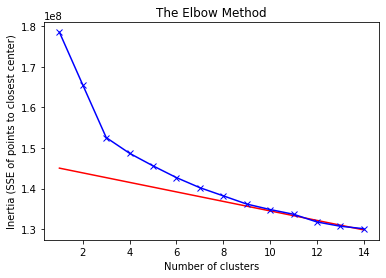

In [ ]:
from sklearn.cluster import KMeans

inertia_l = [] 
K = range(1,15) 

for k in K: 
    #Building and fitting the model 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(azdias_pca)     

    inertia_l.append(kmeans_model.inertia_) 

# linear fit to determine a good number of clusters
fit = np.polyfit(K[10:], inertia_l[10:], 1)
line = np.poly1d(fit)

# plot linear fit line
plt.plot(K, line(K), c='r')
plt.plot(K, inertia_l, 'bx-')

plt.xlabel('Number of clusters') 
plt.ylabel('Inertia (SSE of points to closest center)') 
plt.title('The Elbow Method') 
plt.show() 

I fit the KMeans instance with 8 clusters to the population data and used it to obtain the cluster assignment for the general population and customers.

In [16]:
from sklearn.cluster import KMeans

# fit to number of clusters we determined
kmeans_model_8 = KMeans(n_clusters=8)
kmeans_model_8.fit(azdias_pca)

# predict the cluster each person is in
azdias_pred = kmeans_model_8.predict(azdias_pca)

In [17]:
# predict the cluster each customer is in
customer_pred = kmeans_model_8.predict(customer_pca)

The figure below shows the number of people in the general populatian that fits into each cluster

Text(0.5, 1.0, 'General population')

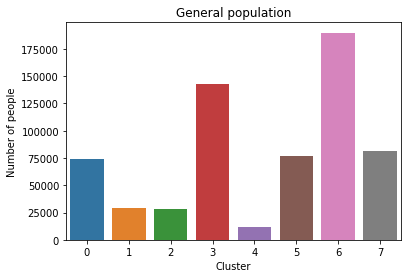

In [18]:
sns.countplot(azdias_pred)
plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.title('General population')

The figure below shows the number of people in the population that fits into each cluster

Text(0.5, 1.0, 'Customers')

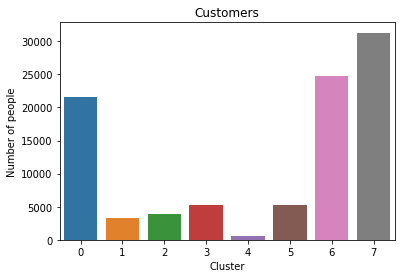

In [19]:
sns.countplot(customer_pred)
plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.title('Customers')

Next, I will plot the percentage of people from the population and customer data that are assigned to each cluster.

If a company's customer-base if fairly universal, then the percentage of people in each cluster for the population and the percentage of people from the customers data should be somewhat similar. If there is a larger percentage of people frpm the customer dataset than from the general population, for example in cluster 7 where ~32% are from the customers dataset and ~12% are from the general population, this suggests that this group might be the target audience of the company.

We can see that clusters 7 and 0 are likely targets of the company while clusters 3 and 5 are outside the targeted group.

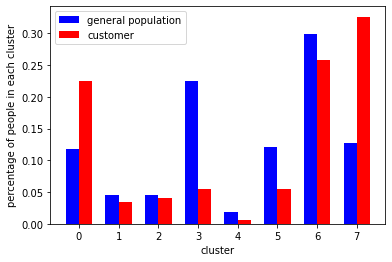

In [20]:
plot_kmeans(customer_pred, azdias_pred)

Below are the clusters that are more popular with the company. 

It seems as if transactional activity based on the product group house decoration, cosmetic products and travel related products are positively related while having the last transaction with the complete file offline and for the segment mail-order offline are negatively related.

In cluster 0, transactional activity based on the product group LOTTO contributes extremely postively to the cluster.


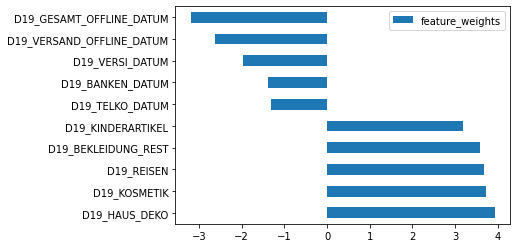

In [25]:
get_important_features(pca_100, kmeans_model_8, 7, customer_scaled)

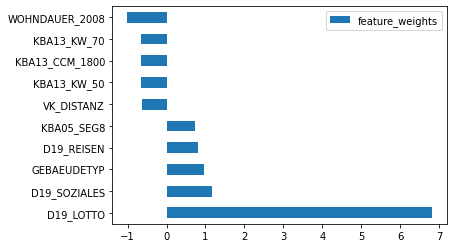

In [21]:
get_important_features(pca_100, kmeans_model_8, 0, customer_scaled)

The next 2 cells shows features of clusters that are relatively unpopular with the company.

The number of households in the building and the transactional activity based on the product group direct bank are positively related.

Features that are negatively related include share of cars with max speed greater than 210 km/h within the PLZ8 and the last transaction for the bank total segment.

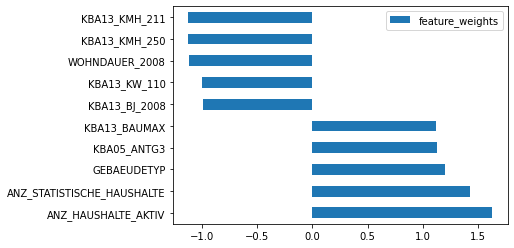

In [26]:
get_important_features(pca_100, kmeans_model_8, 3, customer_scaled)

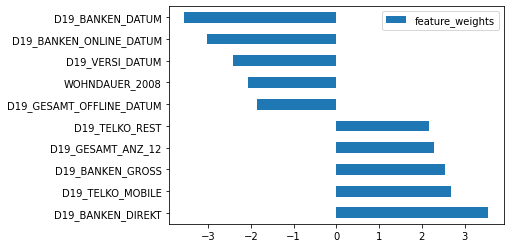

In [24]:
get_important_features(pca_100, kmeans_model_8, 5, customer_scaled)